In [33]:
%matplotlib notebook

In [34]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks

In [35]:
imported_csv=pd.read_csv("crime_property.csv")
crime_property=pd.DataFrame(imported_csv)

In [36]:
crime_property.tail()

,Unnamed: 0,ID,Date,HrOfDate,Primary Type,Description,Location Description,Year,Latitude,Longitude,zipcode,City,CountyName,Property values 4/2019,Property values 4/2020,Per Capita Income 2018
2047,2047,11289542,4/19/2018 6:13,6,BURGLARY,FORCIBLE ENTRY,RESTAURANT,2018,41.880560,-87.641687,60661,Chicago,Cook County,437273,468044,83672.0
2048,2048,11293121,4/22/2018 19:00,19,BURGLARY,ATTEMPT FORCIBLE ENTRY,RESTAURANT,2018,41.884026,-87.641260,60661,Chicago,Cook County,437273,468044,83672.0
2049,2049,11294693,4/23/2018 1:49,1,BURGLARY,FORCIBLE ENTRY,BAR OR TAVERN,2018,41.884434,-87.641968,60661,Chicago,Cook County,437273,468044,83672.0
2050,2050,11278604,4/7/2018 13:04,13,BURGLARY,FORCIBLE ENTRY,COMMERCIAL / BUSINESS OFFICE,2018,41.882366,-87.630882,60602,Chicago,Cook County,394596,376578,100507.0
2051,2051,11287361,4/16/2018 18:00,18,BURGLARY,FORCIBLE ENTRY,RESTAURANT,2018,41.882818,-87.639713,60606,Chicago,Cook County,392362,425795,132765.0


In [37]:
crime_time_of_day=crime_property["HrOfDate"].value_counts()
crime_time_of_day_df=pd.DataFrame(crime_time_of_day)
sort_time_df=crime_time_of_day_df.sort_index()
sort_time_df.tail()

,HrOfDate
19,86
20,55
21,68
22,80
23,82


In [38]:
crime_time_of_day=crime_property["HrOfDate"].value_counts()
crime_time_of_day_df=pd.DataFrame(crime_time_of_day)
sort_time_df=crime_time_of_day_df.sort_index()



In [39]:
sort_time_df.reset_index(level=0,inplace=True)


In [40]:
sort_time_df=sort_time_df.rename(columns={"index":"Time_of_Day",
                                    "HrOfDate": "Crime_Count"})

In [41]:
time_group= crime_property.groupby("HrOfDate")
count_time=time_group["HrOfDate"].count()

<IPython.core.display.Javascript object>


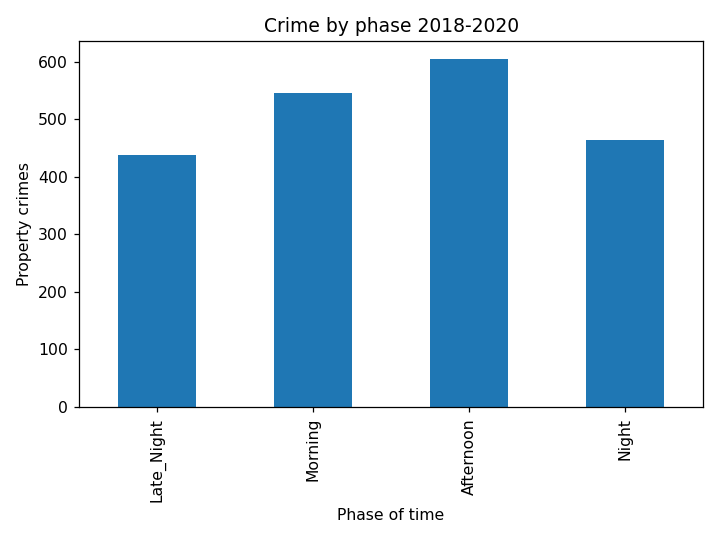

In [42]:
time_chart = count_time.plot(kind='bar')

time_chart.set_xlabel("Time of day")
time_chart.set_ylabel("Property crimes")
time_chart.set_title('Crime by hour 2018-2020')

plt.show()
plt.tight_layout()
plt.savefig('time_chart2.png')

In [43]:
bin =[0, 5, 11, 17, 23]
group_name = ["Late_Night", "Morning", "Afternoon", "Night"]

sort_time_df['Time_of_Day']=pd.cut(sort_time_df['Time_of_Day'], bin, labels=group_name, include_lowest=True)
sort_time_df

,Time_of_Day,Crime_Count
0,Late_Night,126
1,Late_Night,74
2,Late_Night,54
3,Late_Night,79
4,Late_Night,57
5,Late_Night,48
6,Morning,73
7,Morning,78
8,Morning,101
9,Morning,117


In [44]:
time_breakdown=sort_time_df.groupby('Time_of_Day')
time_of_day_count=time_breakdown['Crime_Count'].sum()

In [45]:
time_two =time_of_day_count.plot(kind='bar')
time_two.set_xlabel("Phase of time")
time_two.set_ylabel("Property crimes")
time_two.set_title('Crime by phase 2018-2020')

plt.show()
plt.tight_layout()
plt.savefig('time_breakdown2.png')

In [46]:
zip_and_income=crime_property[['zipcode','Per Capita Income 2018']]
zip_and_income=zip_and_income.set_index('zipcode')
zip_and_income=zip_and_income[~zip_and_income.duplicated(keep="first")]


<IPython.core.display.Javascript object>


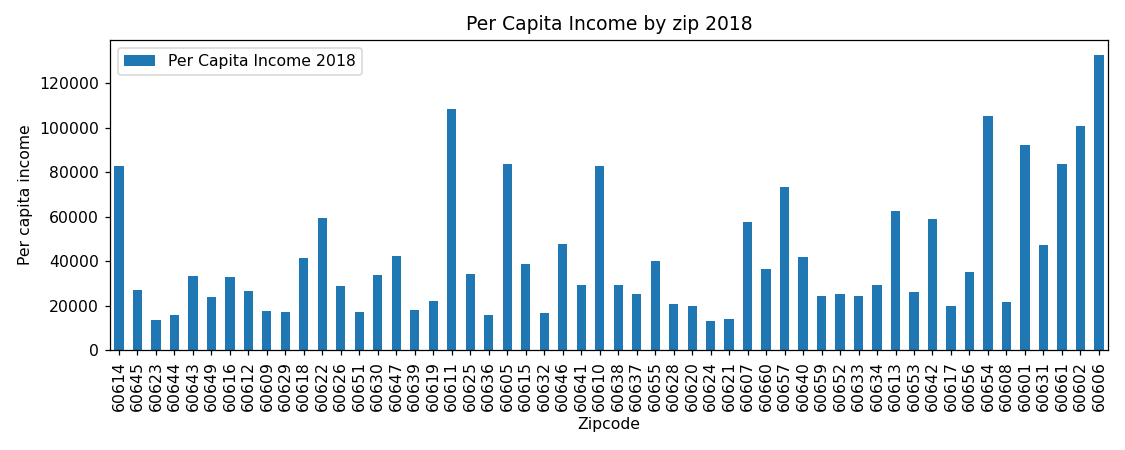

In [47]:
zip_and_income.plot(kind="bar", figsize=(10,4))
plt.xlabel('Zipcode')
plt.ylabel("Per capita income")
plt.title('Per Capita Income by zip 2018')
plt.show()
plt.tight_layout()
plt.savefig('income_by_zip_2018_01.png')

In [48]:
key_csv=pd.read_csv('Zip_code_key.csv')
zip_key_pd=pd.DataFrame(key_csv)

In [49]:
merge_data02=pd.merge(crime_property,zip_key_pd, how="left", on='zipcode')

In [50]:
key_income=pd.DataFrame(merge_data02)

In [51]:
key_income.tail()

,Unnamed: 0,ID,Date,HrOfDate,Primary Type,Description,Location Description,Year,Latitude,Longitude,zipcode,City,CountyName,Property values 4/2019,Property values 4/2020,Per Capita Income 2018,area
2047,2047,11289542,4/19/2018 6:13,6,BURGLARY,FORCIBLE ENTRY,RESTAURANT,2018,41.880560,-87.641687,60661,Chicago,Cook County,437273,468044,83672.0,Downtown
2048,2048,11293121,4/22/2018 19:00,19,BURGLARY,ATTEMPT FORCIBLE ENTRY,RESTAURANT,2018,41.884026,-87.641260,60661,Chicago,Cook County,437273,468044,83672.0,Downtown
2049,2049,11294693,4/23/2018 1:49,1,BURGLARY,FORCIBLE ENTRY,BAR OR TAVERN,2018,41.884434,-87.641968,60661,Chicago,Cook County,437273,468044,83672.0,Downtown
2050,2050,11278604,4/7/2018 13:04,13,BURGLARY,FORCIBLE ENTRY,COMMERCIAL / BUSINESS OFFICE,2018,41.882366,-87.630882,60602,Chicago,Cook County,394596,376578,100507.0,Downtown
2051,2051,11287361,4/16/2018 18:00,18,BURGLARY,FORCIBLE ENTRY,RESTAURANT,2018,41.882818,-87.639713,60606,Chicago,Cook County,392362,425795,132765.0,Downtown


In [52]:
area_income=key_income[['area','Per Capita Income 2018']]
area_income=area_income[~area_income.duplicated(keep="first")]


In [53]:
area_breakdown=area_income.groupby('area')
area_count=area_breakdown.mean()
area_count

,Per Capita Income 2018
area,
Downtown,75878.846154
Far North Side,30297.500000
Far South Side,27560.800000
North Side,49043.250000
North West Side,37094.333333
South Side,20747.916667
South West Side,22998.000000
West Side,30504.400000


<IPython.core.display.Javascript object>


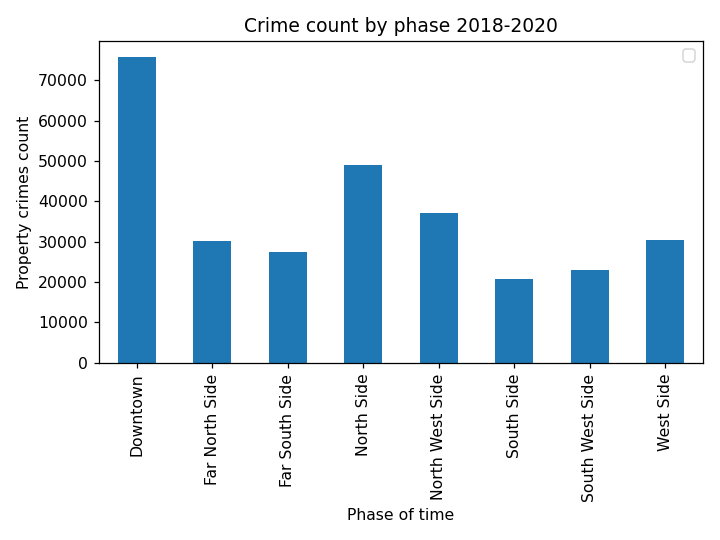

In [54]:
area_count.plot(kind="bar")
plt.xlabel('Area of Chicago')
plt.ylabel('Mean per capita income 2018')
plt.title('Mean per capita Chicago by area')
plt.legend("")
plt.show()
plt.tight_layout()
plt.savefig('mean_per_capita.png')

In [55]:
crime_by_year=crime_property[["Year","HrOfDate"]].value_counts()
crime_by_year_df=pd.DataFrame(crime_by_year)
crime_by_year_df

0
Year HrOfDate    
2018 9         61
     8         54
     12        49
     10        49
     15        47
...            ..
2020 21        12
     6         12
     2         12
2019 20        11
2020 11        11

[72 rows x 1 columns]

In [56]:
crime_year_df=crime_by_year_df.reset_index()
crime_year_df

,Year,HrOfDate,0
0,2018,9,61
1,2018,8,54
2,2018,12,49
3,2018,10,49
4,2018,15,47
...,...,...,...
67,2020,21,12
68,2020,6,12
69,2020,2,12
70,2019,20,11


In [57]:
new_year_df=crime_year_df.rename(columns={'HrOfDate':'Time_of_Day',0:'Crime_Count'})
new_year_df

,Year,Time_of_Day,Crime_Count
0,2018,9,61
1,2018,8,54
2,2018,12,49
3,2018,10,49
4,2018,15,47
...,...,...,...
67,2020,21,12
68,2020,6,12
69,2020,2,12
70,2019,20,11


In [58]:
bin =[0, 5, 11, 17, 23]
group_name = ["Late_Night", "Morning", "Afternoon", "Night"]
new_year_df['Time_of_Day']=pd.cut(new_year_df['Time_of_Day'], bin, labels=group_name, include_lowest=True)
new_year_df

,Year,Time_of_Day,Crime_Count
0,2018,Morning,61
1,2018,Morning,54
2,2018,Afternoon,49
3,2018,Morning,49
4,2018,Afternoon,47
...,...,...,...
67,2020,Night,12
68,2020,Morning,12
69,2020,Late_Night,12
70,2019,Night,11


In [59]:
year_2018=new_year_df.loc[new_year_df['Year']==2018]
year_2019=new_year_df.loc[new_year_df['Year']==2019]
year_2020=new_year_df.loc[new_year_df['Year']==2020]

In [63]:
flip_2018=year_2018["Crime_Count"].tolist()
flip_2019=year_2019["Crime_Count"].tolist()
flip_2020=year_2020["Crime_Count"].tolist()

In [64]:
plotdata=pd.DataFrame({
    "count 2018":year_2018["Crime_Count"],
    "count 2019":year_2019["Crime_Count"],
    "count 2020":year_2020["Crime_Count"]
    }, index=["Late_Night", "Morning", "Afternoon", "Night"])
plotdata.head()
# plt.xlabel("Phase of time")
# plt.ylabel('Property crimes count')
# plt.title('Crime count by phase 2018-2020')

# plt.tight_layout()

,count 2018,count 2019,count 2020
Late_Night,NaN,NaN,NaN
Morning,NaN,NaN,NaN
Afternoon,NaN,NaN,NaN
Night,NaN,NaN,NaN


<IPython.core.display.Javascript object>


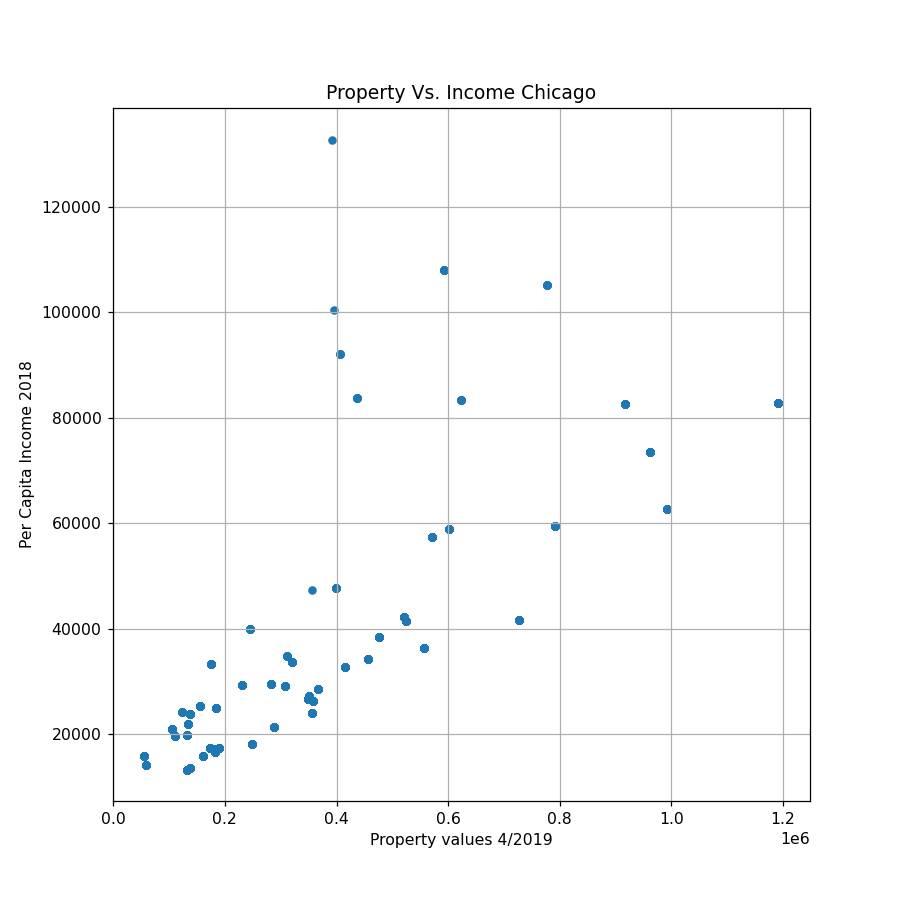

In [66]:
key_income.plot(kind='scatter', y="Per Capita Income 2018", x="Property values 4/2019", grid=True, figsize=(8,8),
               title="Property Vs. Income Chicago")
plt.show()
plt.savefig('Property_vs_income.png')

<IPython.core.display.Javascript object>


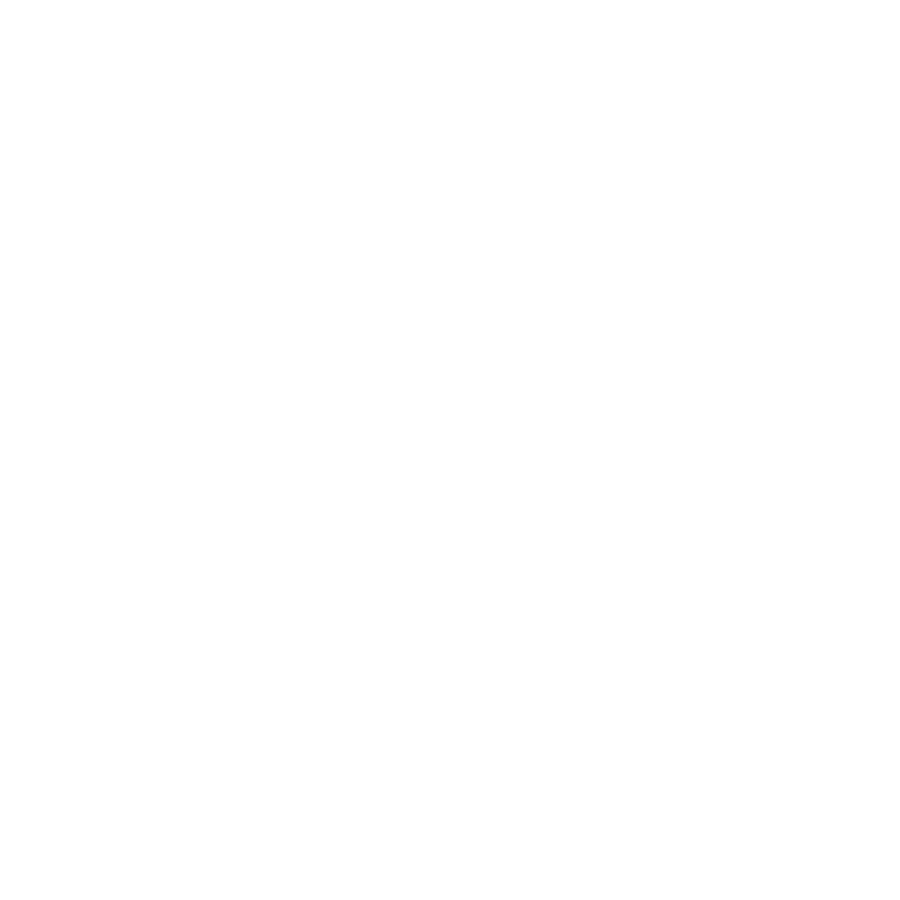

In [31]:
key_income.plot(kind='scatter', y="Per Capita Income 2018", x="Property values 4/2019", grid=True, figsize=(8,8),
               title="Property Vs. Income Chicago")
plt.show()

In [32]:
flip_2019

NameError: name 'flip_2019' is not defined